In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

/kaggle/input/hepatitis-c-dataset/HepatitisCdata.csv


# Load data

In [29]:
data = pd.read_csv("../Data/HepatitisCdata.csv")
data

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


# Pre-processing data

* Remove unnecessary columns

In [30]:
data.drop('Unnamed: 0',axis=1,inplace=True)  

* Transform column

In [31]:
data['Category'] = data['Category'].replace({
    '0=Blood Donor': 0, 
    '0s=suspect Blood Donor': 0, 
    '1=Hepatitis': 1, 
    '2=Fibrosis': 2, 
    '3=Cirrhosis': 3})

data['Sex'] = data['Sex'].replace({'m': 0, 'f': 1})

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    int64  
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    int64  
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 62.6 KB


# Cleaning data

* Check duplicated instances

In [33]:
data.duplicated().sum()

0

* Check NA values

In [34]:
data.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

* Fill NA values by mean values 

In [35]:
data['ALB'].fillna(data['ALB'].mean(), inplace=True)
data['ALP'].fillna(data['ALP'].mean(), inplace=True)
data['CHOL'].fillna(data['CHOL'].mean(), inplace=True)
data['PROT'].fillna(data['PROT'].mean(), inplace=True)
data['ALT'].fillna(data['ALT'].mean(), inplace=True)

In [36]:
data.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [37]:
data.describe()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,0.253659,47.408130,0.386992,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,0.742420,10.055105,0.487458,5.775920,25.643955,25.448940,33.090690,19.673150,2.205657,1.123466,49.756166,54.661071,5.398234
min,0.000000,19.000000,0.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,0.000000,39.000000,0.000000,38.800000,52.950000,16.400000,21.600000,5.300000,6.935000,4.620000,67.000000,15.700000,69.300000
50%,0.000000,47.000000,0.000000,41.900000,66.700000,23.000000,25.900000,7.300000,8.260000,5.310000,77.000000,23.300000,72.200000
75%,0.000000,54.000000,1.000000,45.200000,79.300000,33.050000,32.900000,11.200000,9.590000,6.055000,88.000000,40.200000,75.400000
max,3.000000,77.000000,1.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


# Data analysis

array([[<AxesSubplot:title={'center':'Category'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'ALB'}>],
       [<AxesSubplot:title={'center':'ALP'}>,
        <AxesSubplot:title={'center':'ALT'}>,
        <AxesSubplot:title={'center':'AST'}>,
        <AxesSubplot:title={'center':'BIL'}>],
       [<AxesSubplot:title={'center':'CHE'}>,
        <AxesSubplot:title={'center':'CHOL'}>,
        <AxesSubplot:title={'center':'CREA'}>,
        <AxesSubplot:title={'center':'GGT'}>],
       [<AxesSubplot:title={'center':'PROT'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

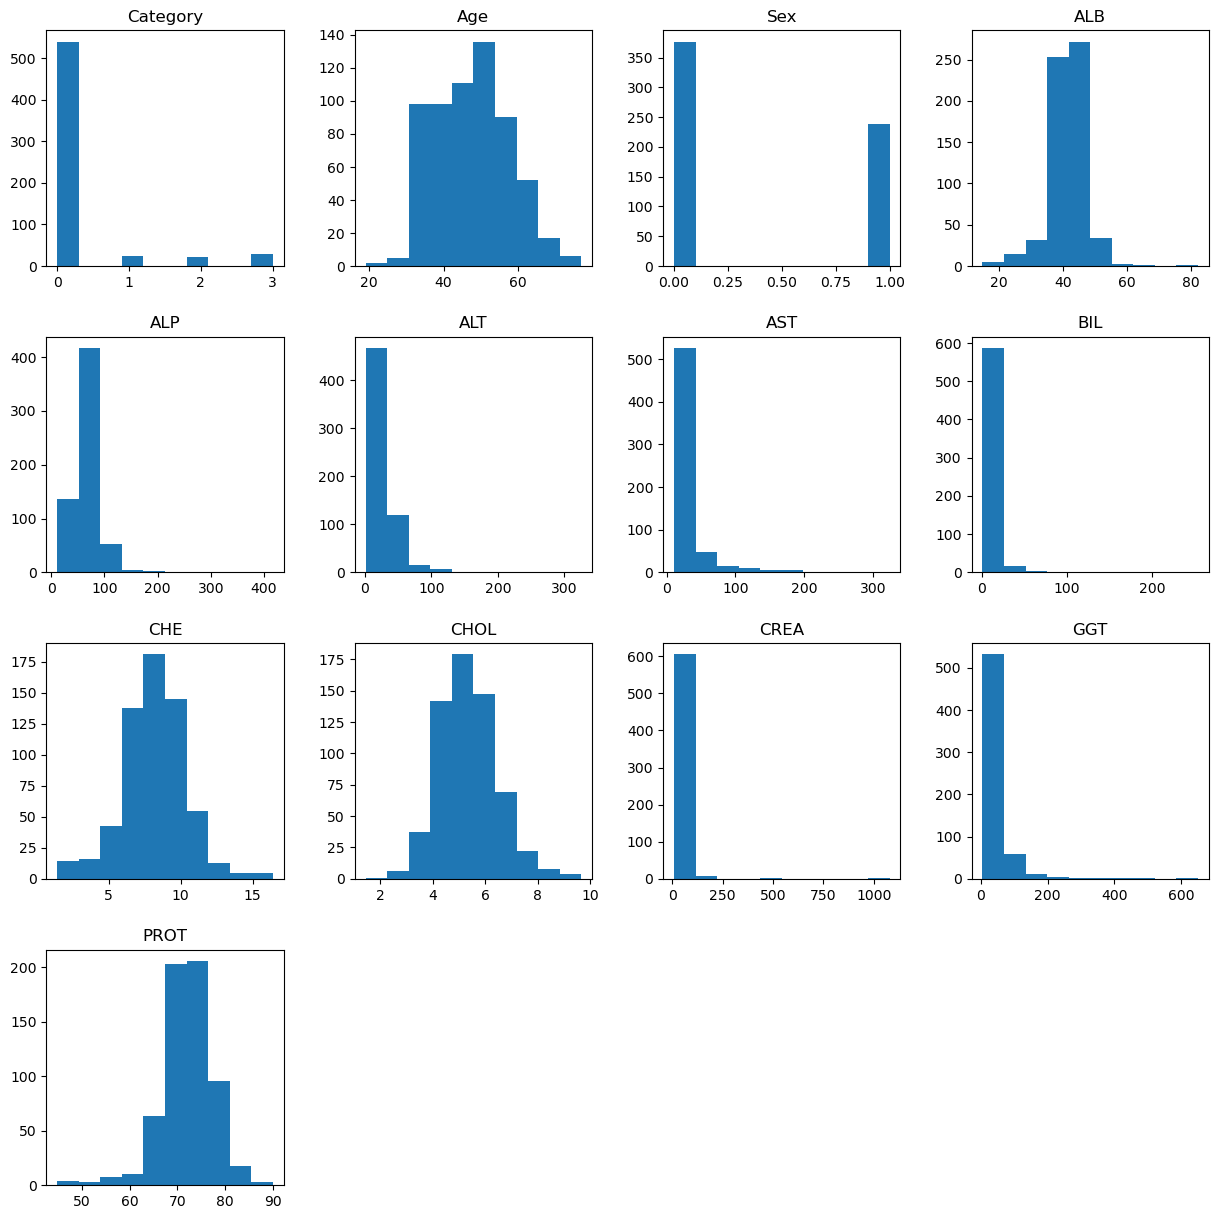

In [38]:
data.hist(figsize = (15,15), grid = False)

* Age

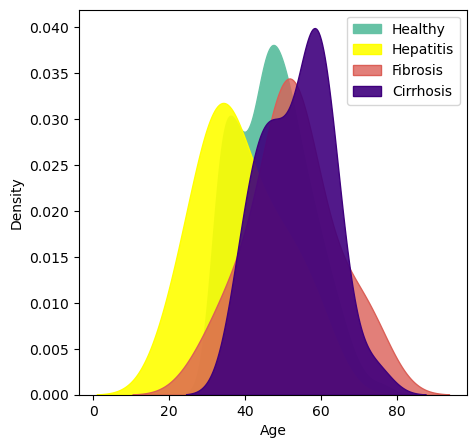

In [39]:
# Set up the figure and axes
fig = plt.subplots(figsize=(5, 5))

sns.kdeplot(x=data["Age"], hue = data[data["Category"] == 0]["Category"], fill=True, alpha=1, palette="Set2", label = "Healthy")
sns.kdeplot(x=data["Age"], hue = data[data["Category"] == 1]["Category"], fill=True, alpha=0.9, palette="autumn_r", label = "Hepatitis")
sns.kdeplot(x=data["Age"], hue = data[data["Category"] == 2]["Category"], fill=True, alpha=0.8, palette="hls", label = "Fibrosis")
sns.kdeplot(x=data["Age"], hue = data[data["Category"] == 3]["Category"], fill=True, alpha=0.9, palette="Purples_r", label = "Cirrhosis")
plt.legend()

* ALB

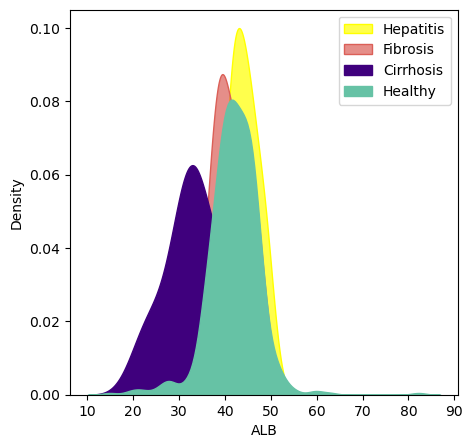

In [40]:
fig = plt.subplots(figsize=(5, 5))

sns.kdeplot(x=data["ALB"], hue = data[data["Category"] == 1]["Category"], fill=True, alpha=0.7, palette="autumn_r", label = "Hepatitis")
sns.kdeplot(x=data["ALB"], hue = data[data["Category"] == 2]["Category"], fill=True, alpha=0.7, palette="hls", label = "Fibrosis")
sns.kdeplot(x=data["ALB"], hue = data[data["Category"] == 3]["Category"], fill=True, alpha=1, palette="Purples_r", label = "Cirrhosis")
sns.kdeplot(x=data["ALB"], hue = data[data["Category"] == 0]["Category"], fill=True, alpha=1, palette="Set2", label = "Healthy")

plt.legend()

* ALP

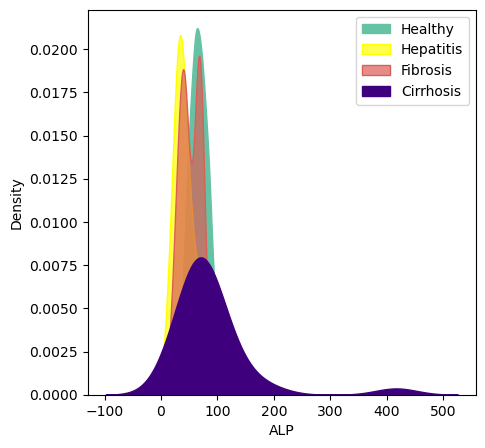

In [41]:
fig = plt.subplots(figsize=(5, 5))


sns.kdeplot(x=data["ALP"], hue = data[data["Category"] == 0]["Category"], fill=True, alpha=1, palette="Set2", label = "Healthy")
sns.kdeplot(x=data["ALP"], hue = data[data["Category"] == 1]["Category"], fill=True, alpha=0.7, palette="autumn_r", label = "Hepatitis")
sns.kdeplot(x=data["ALP"], hue = data[data["Category"] == 2]["Category"], fill=True, alpha=0.7, palette="hls", label = "Fibrosis")
sns.kdeplot(x=data["ALP"], hue = data[data["Category"] == 3]["Category"], fill=True, alpha=1, palette="Purples_r", label = "Cirrhosis")

plt.legend()

* ALT

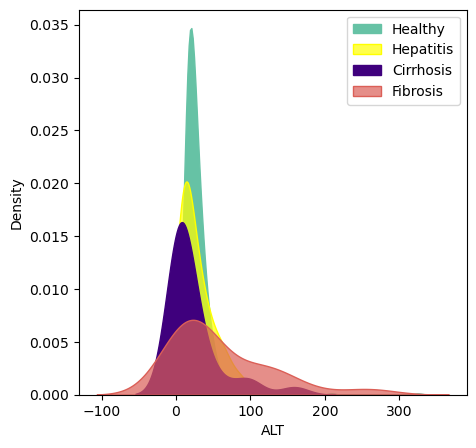

In [42]:
fig = plt.subplots(figsize=(5, 5))


sns.kdeplot(x=data["ALT"], hue = data[data["Category"] == 0]["Category"], fill=True, alpha=1, palette="Set2", label = "Healthy")
sns.kdeplot(x=data["ALT"], hue = data[data["Category"] == 1]["Category"], fill=True, alpha=0.7, palette="autumn_r", label = "Hepatitis")
sns.kdeplot(x=data["ALT"], hue = data[data["Category"] == 3]["Category"], fill=True, alpha=1, palette="Purples_r", label = "Cirrhosis")
sns.kdeplot(x=data["ALT"], hue = data[data["Category"] == 2]["Category"], fill=True, alpha=0.7, palette="hls", label = "Fibrosis")


plt.legend()

* AST

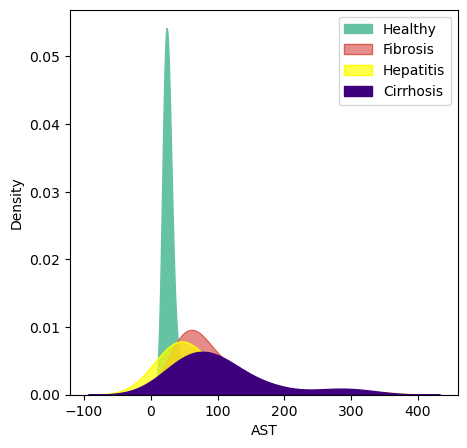

In [43]:
fig = plt.subplots(figsize=(5, 5))


sns.kdeplot(x=data["AST"], hue = data[data["Category"] == 0]["Category"], fill=True, alpha=1, palette="Set2", label = "Healthy")
sns.kdeplot(x=data["AST"], hue = data[data["Category"] == 2]["Category"], fill=True, alpha=0.7, palette="hls", label = "Fibrosis")
sns.kdeplot(x=data["AST"], hue = data[data["Category"] == 1]["Category"], fill=True, alpha=0.7, palette="autumn_r", label = "Hepatitis")
sns.kdeplot(x=data["AST"], hue = data[data["Category"] == 3]["Category"], fill=True, alpha=1, palette="Purples_r", label = "Cirrhosis")


plt.legend()

* BIL

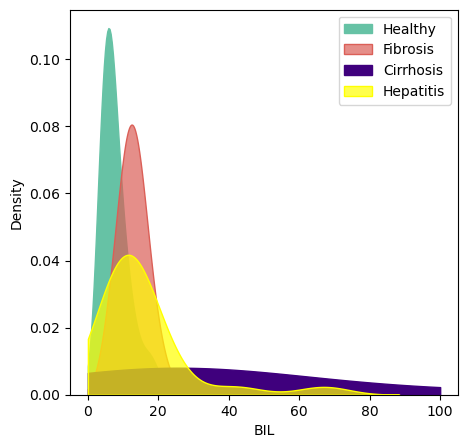

In [44]:
fig = plt.subplots(figsize=(5, 5))


sns.kdeplot(x=data["BIL"], hue = data[data["Category"] == 0]["Category"], fill=True, alpha=1, palette="Set2", label = "Healthy", clip = [0,100])
sns.kdeplot(x=data["BIL"], hue = data[data["Category"] == 2]["Category"], fill=True, alpha=0.7, palette="hls", label = "Fibrosis", clip = [0,100])
sns.kdeplot(x=data["BIL"], hue = data[data["Category"] == 3]["Category"], fill=True, alpha=1, palette="Purples_r", label = "Cirrhosis", clip = [0,100])

sns.kdeplot(x=data["BIL"], hue = data[data["Category"] == 1]["Category"], fill=True, alpha=0.7, palette="autumn_r", label = "Hepatitis", clip = [0,100])


plt.legend()

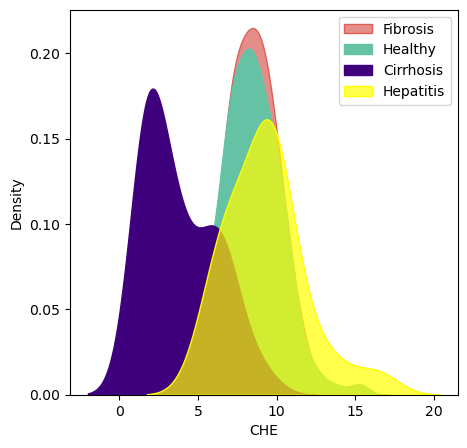

In [45]:
fig = plt.subplots(figsize=(5, 5))


sns.kdeplot(x=data["CHE"], hue = data[data["Category"] == 2]["Category"], fill=True, alpha=0.7, palette="hls", label = "Fibrosis")
sns.kdeplot(x=data["CHE"], hue = data[data["Category"] == 0]["Category"], fill=True, alpha=1, palette="Set2", label = "Healthy")

sns.kdeplot(x=data["CHE"], hue = data[data["Category"] == 3]["Category"], fill=True, alpha=1, palette="Purples_r", label = "Cirrhosis")
sns.kdeplot(x=data["CHE"], hue = data[data["Category"] == 1]["Category"], fill=True, alpha=0.7, palette="autumn_r", label = "Hepatitis")


plt.legend()

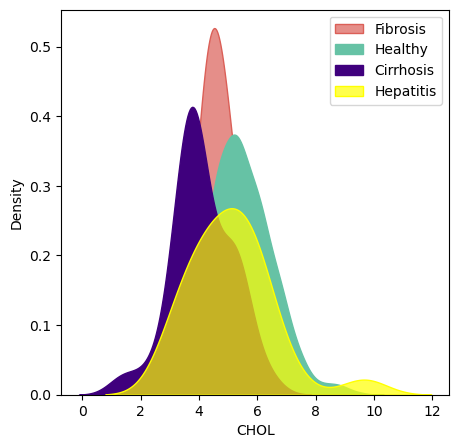

In [46]:
fig = plt.subplots(figsize=(5, 5))


sns.kdeplot(x=data["CHOL"], hue = data[data["Category"] == 2]["Category"], fill=True, alpha=0.7, palette="hls", label = "Fibrosis")
sns.kdeplot(x=data["CHOL"], hue = data[data["Category"] == 0]["Category"], fill=True, alpha=1, palette="Set2", label = "Healthy")

sns.kdeplot(x=data["CHOL"], hue = data[data["Category"] == 3]["Category"], fill=True, alpha=1, palette="Purples_r", label = "Cirrhosis")
sns.kdeplot(x=data["CHOL"], hue = data[data["Category"] == 1]["Category"], fill=True, alpha=0.7, palette="autumn_r", label = "Hepatitis")


plt.legend()

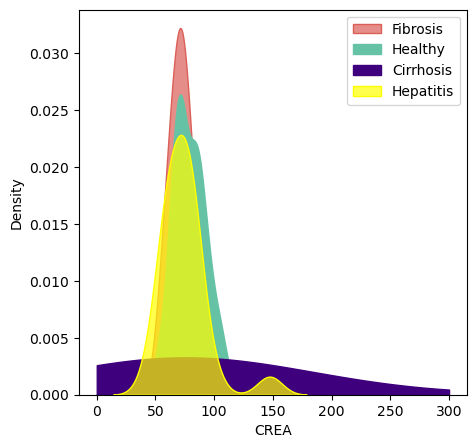

In [47]:
fig = plt.subplots(figsize=(5, 5))


sns.kdeplot(x=data["CREA"], hue = data[data["Category"] == 2]["Category"], fill=True, alpha=0.7, palette="hls", label = "Fibrosis", clip = [0,300])
sns.kdeplot(x=data["CREA"], hue = data[data["Category"] == 0]["Category"], fill=True, alpha=1, palette="Set2", label = "Healthy", clip = [0,300])

sns.kdeplot(x=data["CREA"], hue = data[data["Category"] == 3]["Category"], fill=True, alpha=1, palette="Purples_r", label = "Cirrhosis", clip = [0,300])
sns.kdeplot(x=data["CREA"], hue = data[data["Category"] == 1]["Category"], fill=True, alpha=0.7, palette="autumn_r", label = "Hepatitis", clip = [0,300])


plt.legend()

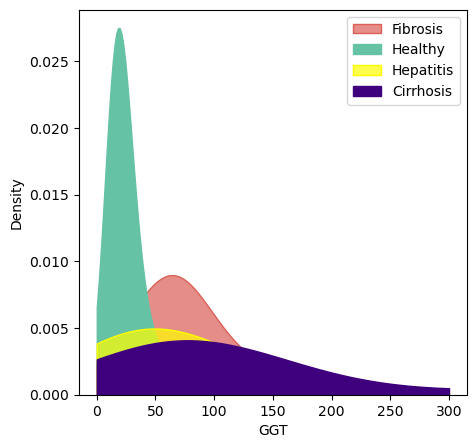

In [48]:
fig = plt.subplots(figsize=(5, 5))


sns.kdeplot(x=data["GGT"], hue = data[data["Category"] == 2]["Category"], fill=True, alpha=0.7, palette="hls", label = "Fibrosis", clip = [0,300])
sns.kdeplot(x=data["GGT"], hue = data[data["Category"] == 0]["Category"], fill=True, alpha=1, palette="Set2", label = "Healthy", clip = [0,300])

sns.kdeplot(x=data["GGT"], hue = data[data["Category"] == 1]["Category"], fill=True, alpha=0.7, palette="autumn_r", label = "Hepatitis", clip = [0,300])
sns.kdeplot(x=data["GGT"], hue = data[data["Category"] == 3]["Category"], fill=True, alpha=1, palette="Purples_r", label = "Cirrhosis", clip = [0,300])


plt.legend()

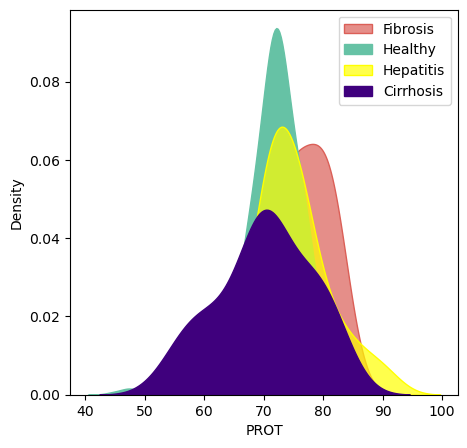

In [49]:
fig = plt.subplots(figsize=(5, 5))


sns.kdeplot(x=data["PROT"], hue = data[data["Category"] == 2]["Category"], fill=True, alpha=0.7, palette="hls", label = "Fibrosis")
sns.kdeplot(x=data["PROT"], hue = data[data["Category"] == 0]["Category"], fill=True, alpha=1, palette="Set2", label = "Healthy")

sns.kdeplot(x=data["PROT"], hue = data[data["Category"] == 1]["Category"], fill=True, alpha=0.7, palette="autumn_r", label = "Hepatitis")
sns.kdeplot(x=data["PROT"], hue = data[data["Category"] == 3]["Category"], fill=True, alpha=1, palette="Purples_r", label = "Cirrhosis")


plt.legend()

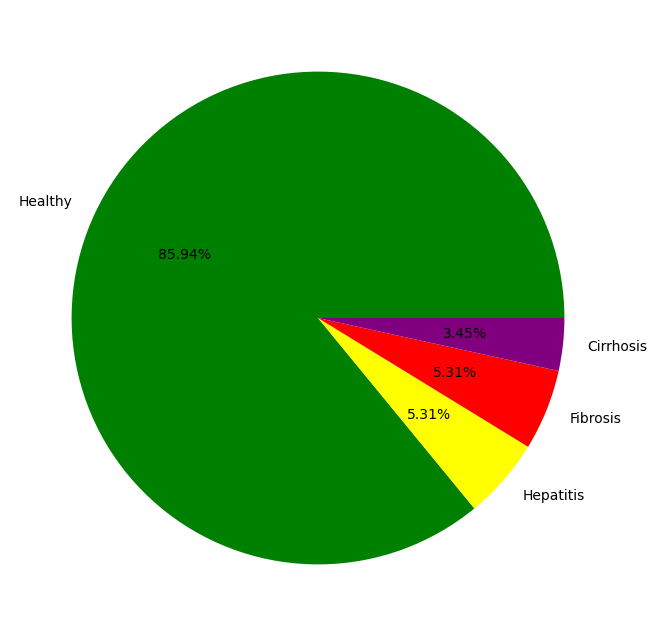

In [50]:
fig = plt.subplots(figsize=(8,8))
plt.pie(x=data[data["Sex"] == 0]["Category"].value_counts(), 
        colors=["green","yellow", "red", "purple"], 
        labels=["Healthy","Hepatitis", "Fibrosis", "Cirrhosis"], 
        autopct="%1.2f%%", 
        )


plt.show()

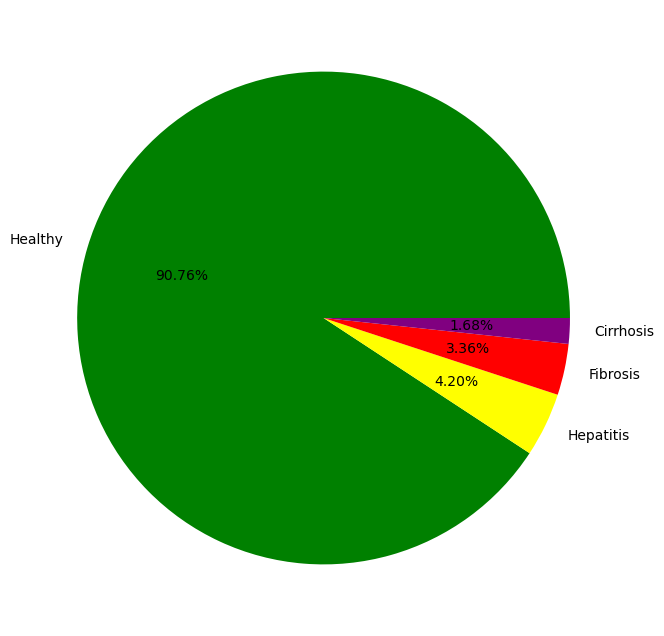

In [51]:
fig = plt.subplots(figsize=(8,8))
plt.pie(x=data[data["Sex"] == 1]["Category"].value_counts(), 
        colors=["green","yellow", "red", "purple"], 
        labels=["Healthy","Hepatitis", "Fibrosis", "Cirrhosis"], 
        autopct="%1.2f%%", 
        )
plt.show()

In [52]:
# scatter_matrix(data,figsize=(20,20))
# plt.show()

* Heat map correlation

<AxesSubplot:>

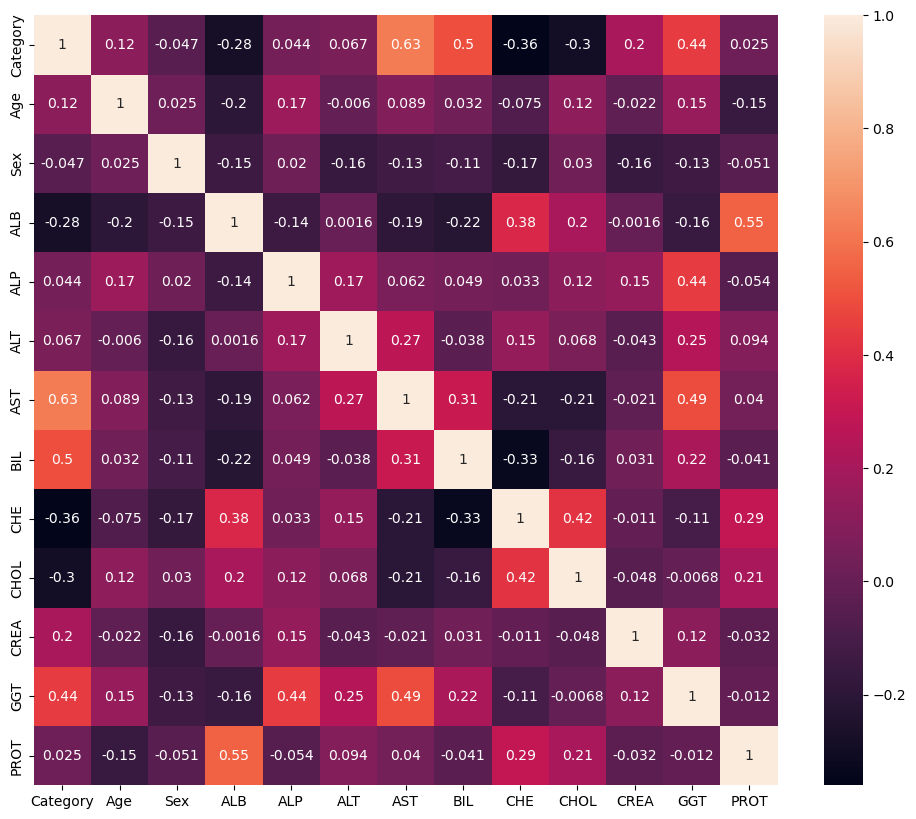

In [53]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, 
#             cmap='blue', 
            ax = ax
           )

In [54]:
data['Category'] = data.Category.astype('category')
data['Sex'] = data.Sex.astype('category')
data.to_csv("../Data/HepatitisC_Final_Ver.csv", index = False)